## Writing a fieldfile for OF from a given mesh

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
import os
from scipy.interpolate import griddata
from scipy import interpolate
from scipy.interpolate import interpn

import meshio
import re

In [2]:
path2folder='airfoil2d/airFoil_30/VTK/airFoil_30_211/'
meshfilename='internal.vtu'
folders=os.listdir(path2folder)
path2file=path2folder+meshfilename
print(path2file)
print(p_c.shape)

airfoil2d/airFoil_30/VTK/airFoil_30_211/internal.vtu


NameError: name 'p_c' is not defined

In [3]:
# loads the mesh and splits all relevant info into seperate variables
mesh=meshio.read(path2file)

cell_ptsid=mesh.cells_dict

#what happens if the mesh is not only hexahedron?
cell_ptsid=np.array(cell_ptsid['hexahedron'])

points = mesh.points

In [4]:
print(mesh)

<meshio mesh object>
  Number of points: 21812
  Number of cells:
    hexahedron: 10720
  Point data: div(phi), nuTilda, nut, p, U, momentError
  Cell data: div(phi), nuTilda, nut, p, U, momentError
  Field data: TimeValue


In [5]:
cell_pts=points[cell_ptsid[:,:]]
print(cell_pts.shape)
vertex=np.average(cell_pts,axis=1)
print(vertex.shape)
print(p_c.shape)

(10720, 8, 3)
(10720, 3)


NameError: name 'p_c' is not defined

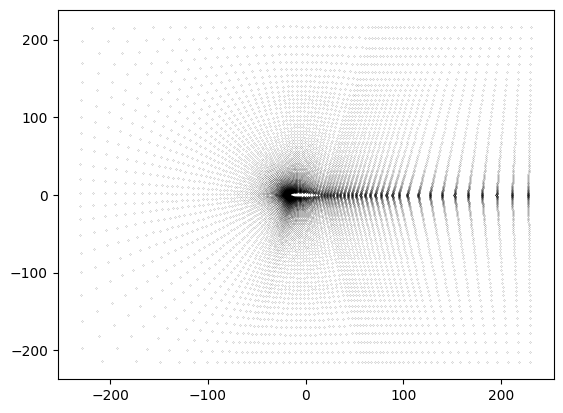

In [6]:
#plt.scatter(points[:,0],points[:,1], c=p_t, s=0.01)
#plt.scatter(cell_pts[:,:,0],cell_pts[:,:,1], c='r', s=.01)
plt.scatter(vertex[:,0],vertex[:,1], c='k', s=.01)

## Export to Openfoam

In [7]:
path2folder='airfoil2d/mesh_export_test/0.orig/'
channel='p'
folders=os.listdir(path2folder)
print(folders)

['nut', 'nuTilda', 'p', 'U']


In [8]:
with open(path2folder+channel,"r") as f:
    contents=f.readlines()

In [9]:
# finds the line where the internal field is being adressed
idx = [j for j, item in enumerate(contents) if re.search('internalField   ', item)]


Test with gradient defined by x Value of vertex

In [11]:
#iterates through the vertices and saves the corresponding values
string=''
for i in range(vertex.shape[1]):
    string = string + str(vertex[i,0]) + '\n'

In [12]:
# creates a complete list will all lines that need to be written in the field file
contents[idx[0]]='internalField   nonuniform List<scalar>'+'\n'+str(np.array(p_c).shape[1])+'\n'+'('+string+');'

NameError: name 'p_c' is not defined

In [315]:
#writes the final file
path2folder='airfoil2d/mesh_export_test/0/'
with open(path2folder+channel,"w") as f:
    f.writelines(contents)

## interpolate with predicition

In [19]:
normal=[ 4.49073389e3 ,4.49073389e+03, 4.49073389e+03, 4.06376920e+07 ]
pred=np.load('p_test.npy')
[y_steps, x_steps,layers]=pred.shape
pred_xlim =[-50,50]
pred_ylim = [-20 , 20]
[a,b,n]=pred.shape

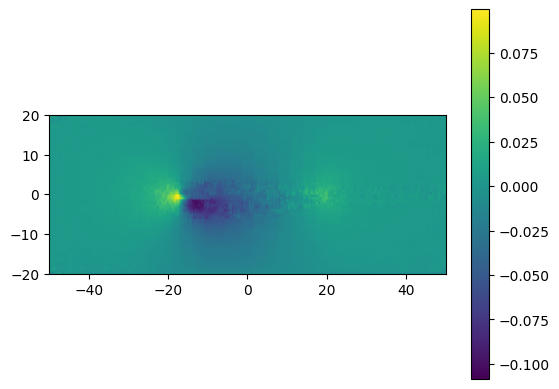

In [20]:
plt.imshow(pred[:,:,3],extent=[-50,50,-20,20])
plt.colorbar()

In [25]:
x = np.arange(pred_xlim[0],pred_xlim[1], (pred_xlim[1]-pred_xlim[0])/x_steps)
y = np.arange(pred_ylim[0],pred_ylim[1], (pred_ylim[1]-pred_ylim[0])/y_steps)
z=pred[:,:,3]
print(z.shape)

(66, 256)


In [30]:
pred_int=[]
znew=[]
znew.append( interpolate.interpn((x, y) , np.transpose(pred[:,:,3]), vertex[:,0:2],
                                 bounds_error=False,
                                 method='nearest',
                                 fill_value=None,
                                ))
print(np.array(znew).shape)

(1, 10720)


In [33]:
pred_int=np.array(pred_int)
print(pred_int.shape)

(0,)


(1, 10720)


(-50.0, 50.0)

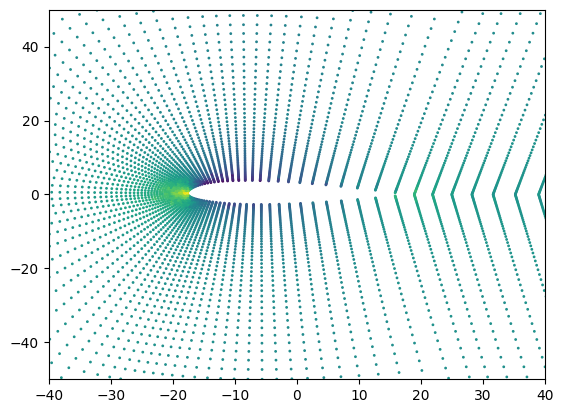

In [32]:
znew=np.array(znew)
znew=znew*normal[0]
print(znew.shape)
#plt.scatter(cell_pts[:,:,0],cell_pts[:,:,1], c='k', s=.001)
plt.scatter(vertex[:,0],vertex[:,1], c=znew, s=1)
plt.xlim([-40,40])
plt.ylim([-50,50])

## Export to Openfoam

In [34]:
path2folder='airfoil2d/mesh_export_test/0.orig/'
channel='p'
folders=os.listdir(path2folder)
print(folders)

['nut', 'nuTilda', 'p', 'U']


In [35]:
with open(path2folder+channel,"r") as f:
    contents=f.readlines()

In [36]:
# finds the line where the internal field is being adressed
idx = [j for j, item in enumerate(contents) if re.search('internalField   ', item)]

In [38]:
#iterates through the vertices and saves the corresponding values
string=''
for i in range(vertex.shape[1]):
    string = string + str(znew[0,i]) + '\n'

# creates a complete list will all lines that need to be written in the field file
contents[idx[0]]='internalField   nonuniform List<scalar>'+'\n'+str(np.array(vertex).shape[1])+'\n'+'('+string+');'

In [537]:
#writes the final file
path2folder='airfoil2d/mesh_export_test/0/'
with open(path2folder+channel,"w") as f:
    f.writelines(contents)